In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD # Use TruncatedSVD for sparse data
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv('/content/cleaned_dataset_updated.csv')

# Display the first few rows to verify
print("Original DataFrame:")
print(df.head())
 # Use the 'tweet' column for text data
X = df['tweet']
# Use the 'class' column for labels
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Original DataFrame:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      1   
1           1      3            0                   3        0      0   
2           2      3            0                   3        0      0   
3           3      3            0                   2        1      0   
4           4      6            0                   6        0      0   

                                               tweet  \
0  retweet as a woman you should not complain abo...   
1  retweet boy dats coldtyga down bad for cuffin ...   
2  retweet dawg retweet you ever fuck a bitch and...   
3                     retweet she look like a tranny   
4  retweet the shit you hear about me might be tr...   

                                        tweet_tokens  
0  ['retweet', 'woman', 'complain', 'cleaning', '...  
1  ['retweet', 'boy', 'dat', 'coldtyga', 'bad', '...  
2  ['retweet', 'dawg', 'retweet', 'ever

## **TF - IDF** **Vectorization**




In [2]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
X_train = X_train.fillna('')  # Replace NaN with empty strings
X_test = X_test.fillna('')
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


##  **Model Traning  using Random Forest Model**

In [3]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and evaluate the model
pipeline_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = pipeline_rf.predict(X_test_tfidf)

print("TF-IDF Encoding with Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_rf)
classification_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


TF-IDF Encoding with Random Forest
Accuracy: 0.9293927778898528
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      4124
           1       0.78      0.81      0.79       833

    accuracy                           0.93      4957
   macro avg       0.87      0.88      0.88      4957
weighted avg       0.93      0.93      0.93      4957

Accuracy: 0.9293927778898528
Precision: 0.9303333708198182
Recall: 0.9293927778898528
F1 Score: 0.9298236296067285


Confusion Matrix:
 [[3936  188]
 [ 162  671]]


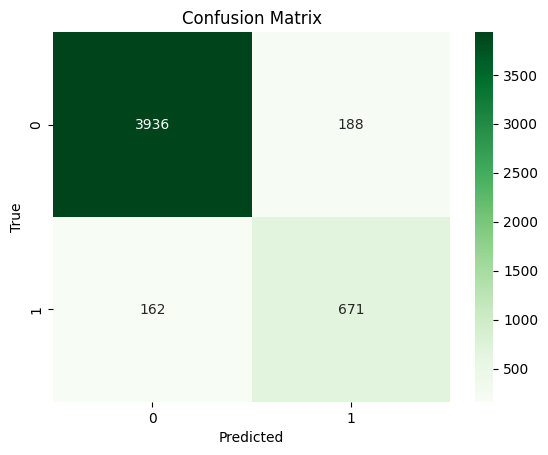

In [4]:


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Model Traning Using Naive Bayes Model**

In [6]:

# Naive Bayes Pipeline

pipeline_tfidf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', MultinomialNB())
])

# Train and evaluate the model
pipeline_tfidf.fit(X_train_resampled, y_train_resampled)
y_pred_tfidf = pipeline_tfidf.predict(X_test_tfidf)

print("TF-IDF Encoding with Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_tfidf)
classification_report_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

TF-IDF Encoding with Naive Bayes
Accuracy: 0.8553560621343554
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      4124
           1       0.55      0.76      0.64       833

    accuracy                           0.86      4957
   macro avg       0.75      0.82      0.77      4957
weighted avg       0.88      0.86      0.86      4957

Accuracy: 0.8553560621343554
Precision: 0.8807461450368073
Recall: 0.8553560621343554
F1 Score: 0.8640266750648763


Confusion Matrix:
 [[3607  517]
 [ 200  633]]


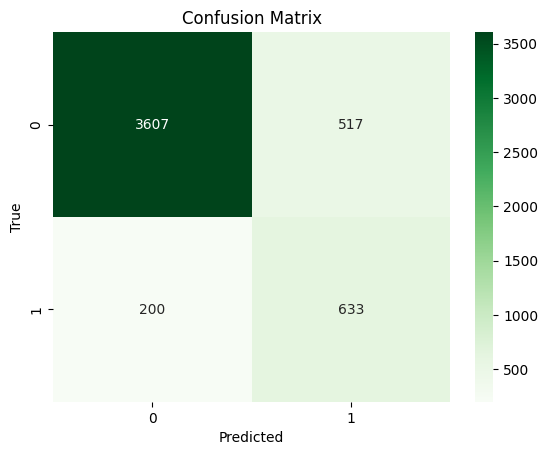

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Model Traning Using Naive Bayes Model**

In [8]:
from sklearn.linear_model import LogisticRegression
  # Logistic Regression Pipeline
pipeline_tfidf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and evaluate the model
pipeline_tfidf.fit(X_train_resampled, y_train_resampled)
y_pred_tfidf = pipeline_tfidf.predict(X_test_tfidf)

print("TF-IDF Encoding with Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_tfidf)
classification_report_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


TF-IDF Encoding with Logistic Regression
Accuracy: 0.9334274762961469
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4124
           1       0.77      0.86      0.81       833

    accuracy                           0.93      4957
   macro avg       0.87      0.90      0.89      4957
weighted avg       0.94      0.93      0.93      4957

Accuracy: 0.9334274762961469
Precision: 0.9374997158327829
Recall: 0.9334274762961469
F1 Score: 0.934903794944325


Confusion Matrix:
 [[3909  215]
 [ 115  718]]


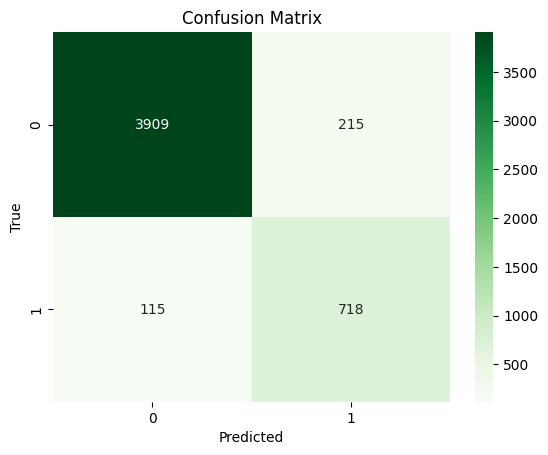

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion :**  
*    **Random Forest** Model we are getting accuracy of **92%**.

*  **Naive Beyes** model which getting **85%** accuracy.

*  **Logistic Regression** which getting **93%** of accuracy which is highest among other models in Hate Speech Detection from Tweets on Tweeter platform.  







